# Проект по анализу данных 
> ![Welcome](https://www.meme-arsenal.com/memes/196dda8309e45b28ed93898d64c92d55.jpg)

   _Выполнили: Агамалов, Кузьмина, Нурдинова_

### Данные для анализа были взяты с [сайта](https://www.kaggle.com/datasets/adityamishraml/laptops/code)
_(Возможно, в дальнейшем мы решим спарсить больше моделей ноутбуков)_

###### Описание датасета:
- Компания производитель – Lenovo, Apple, Dell, HP, Asus, Acer, MSI, Toshiba, Samsung, Mediacom, Razer, Microsoft, Chuwi, Xiaomi, Vero, LG, Huawei, Google, Fujitsu
- Модель ноутбука – Ultrabook, Notebook, 2 in 1 convertible, Gaming, Workstation, Netbook
Далее мы рассмотрим особенности каждой модели:
* Notebook – то, что мы обычно подразумеваем под термином ноутбук xDD очень многофункциональны, относительно других моделей, т.е. можно использовать как для работы, так и может потянуть какие-нибудь игры
* Ultrabook – главным преимуществом является портативность относительно ноутбуков, т.е. более тонкие, легкие 
* 2 in 1 Convertible – ноутбуки-планшеты, имеют сенсорный экран, хорошее решение для художников
* Workstation – рабочая станция, специализированный высокопроизводительный компьютер для тех, кому необходима надежная и производительная система, гарантирующая стабильную и эффективную работу приложений. В основном предназначены для обработки видео, звука, изображений
* Netbook – те же ноутбуки, но более упрощены, имеют очень маленькую диагональ, в основном предназначены для офисной работы и нет-серфинга
* Gaming – игровые ноутбуки, которые отличаются от обычных ноутбуков своей мощностью за счет видеокарт, так же, как правило, имеют большую герцовку монитора.
* Inches – размер монитора в дюймах
* Touchscreen – наличие/отсутствие сенсорного экрана
* Ipspanel – ips-монитор, мониторы которые отличаются обеспечением лучшего угла обзора, более точная цветопередача
* Retinadisplay – мониторы, отличающиеся повышенной плотностью пикселей, используются в устройствах Apple
* Resolution_width и Resolution_height – размеры монитора в пикселях в ширину и высоту соответственно
* Cpu_brand – компания-производитель процессора
* Cpu_name – модель процессора
* Cpu_speed – скорость работы процессора
* Ram – оперативная память
* Memory – доступные типы дисков на ноутбуке
* Hdd и Ssd – тип диска
* Flashstorage – найти в интернете описания не удалось, но на основе данных из фдатасета мы предполагаем, что это размер флэша-карты, которую можно вставить в ноутбук для дополнительного хранения информации.
* Hybrid – гибридные внутренние жесткие диски (SSHD), сочетает в себе технологии SSD и HDD (очень не актуальный тип жесткого диска, предоставлен в одной модели из датасета, уберем в дальнейшей)
* Gpu_brand – компания-производитель видеокарты
* Gpu_name – модель видеокарты
* OpSys – операционная система
* Weight_kg – вес ноутбука в килограммах
* Price – цена данной модели ноутбука, выраженная в индийских рупияхПосле идентификации переменных и их анализа становится понятно, что некоторые столбы можно удалить, поскольку они содержат минимум информации (большинство ячеек нулевые) и не являются репрезентативными данными, тем самым сократив таблицу, с которой мы работаем. 


_После идентификации переменных и их анализа становится понятно, что некоторые столбы можно удалить, поскольку они содержат минимум информации (большинство ячеек нулевые) и не являются репрезентативными данными, тем самым сократив таблицу, с которой мы работаем._
#### Выбранные для удаления переменные считаем нерепрезентативными, основываясь на некоторых факторах, а именно: 
 1) Данные колонок hdd, ssd, hybrid, flashstorage по идее итак учтены в колонке Memory, поэтому их можно удалить;
 2) Колонка retinadisplay удаляется за счет того, что данная технология используется только компанией Apple, и среднее (mean) по данной колонке 0.013 (~1.3%), что означает, что остальные 98.7% ноутбуков не имеют такой характеристики. На следующем этапе проекта мы удалим эти данные.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('laptops.csv')
df.head()

,indx,Company,TypeName,Inches,touchscreen,ipspanel,retinadisplay,resolution_width,resolution_height,cpu_brand,...,Memory,hdd,ssd,flashstorage,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
0,1,Toshiba,Ultrabook,13.3,0,0,0,1920,1080,Intel,...,256GB SSD,0,256,0,0,Intel,HD Graphics 520,windows,1.20,72621
1,2,Apple,Ultrabook,13.3,0,1,1,2560,1600,Intel,...,128GB SSD,0,128,0,0,Intel,Iris Plus Graphics 640,macos,1.37,71379
2,3,HP,Notebook,17.3,0,0,0,1920,1080,Intel,...,128GB SSD + 1TB HDD,1024,128,0,0,Nvidia,GeForce 930MX,windows,2.50,52055
3,4,Dell,Notebook,15.6,0,0,0,1920,1080,Intel,...,1TB HDD,1024,0,0,0,Intel,HD Graphics 620,windows,2.18,35005
4,5,HP,Notebook,15.6,0,0,0,1920,1080,AMD,...,256GB SSD,0,256,0,0,AMD,Radeon R4 Graphics,windows,1.86,21232


In [4]:
df.TypeName.value_counts() 

Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            28
Netbook                24
Name: TypeName, dtype: int64

Text(0, 0.5, 'Компания')

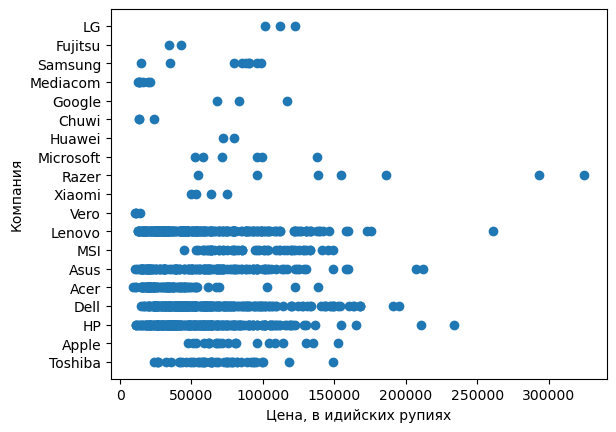

In [5]:
plt.scatter(df.Price, df.Company)
plt.xlabel("Цена, в идийских рупиях")
plt.ylabel("Компания")

In [6]:
data = df.describe()
data

,indx,Inches,touchscreen,ipspanel,retinadisplay,resolution_width,resolution_height,cpu_speed,Ram,hdd,ssd,flashstorage,hybrid,Weight_kg,Price
count,1272.00000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,636.50000,15.130818,0.145440,0.282233,0.013365,1894.199686,1070.531447,2.298192,8.463050,423.132075,182.534591,4.591195,9.254717,2.076211,59902.143082
std,367.33908,1.954436,0.352683,0.450263,0.114876,494.389426,284.512222,0.507680,5.566582,527.514262,185.636660,30.578213,95.876648,0.809869,37297.683852
min,1.00000,10.100000,0.000000,0.000000,0.000000,1366.000000,768.000000,0.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9271.000000
25%,318.75000,14.000000,0.000000,0.000000,0.000000,1600.000000,900.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.500000,31915.000000
50%,636.50000,15.600000,0.000000,0.000000,0.000000,1920.000000,1080.000000,2.500000,8.000000,0.000000,256.000000,0.000000,0.000000,2.040000,52108.000000
75%,954.25000,15.600000,0.000000,1.000000,0.000000,1920.000000,1080.000000,2.700000,8.000000,1024.000000,256.000000,0.000000,0.000000,2.320000,79244.500000
max,1272.00000,35.600000,1.000000,1.000000,1.000000,3840.000000,2160.000000,3.600000,64.000000,2048.000000,1024.000000,512.000000,1024.000000,11.100000,324955.000000


Text(0, 0.5, 'Frequency')

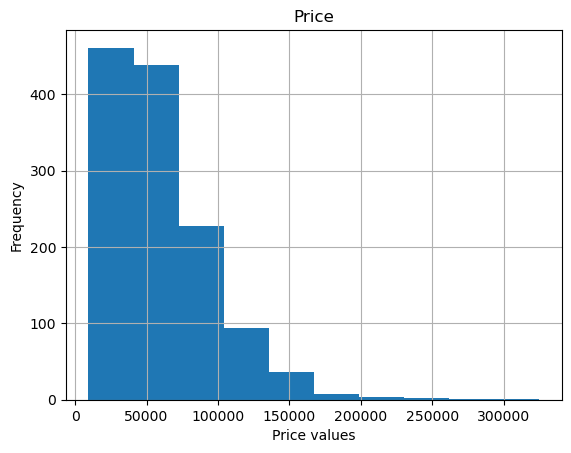

In [7]:
hist1 = df['Price'].hist()
hist1.set_title('Price')
hist1.set_xlabel('Price values')
hist1.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

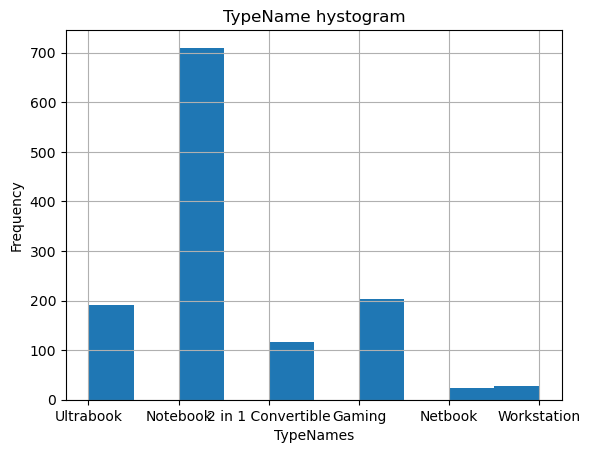

In [8]:
hist1 = df['TypeName'].hist()
hist1.set_title('TypeName hystogram')
hist1.set_xlabel('TypeNames')
hist1.set_ylabel('Frequency')